In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/beegfs/scratch_copy/ahringer/jj374/lab/relmapping


In [2]:
#df_ = pd.read_csv('annot/Fig2S3_tss/Chen2013_tss.bed', sep='\t', names=yp.NAMES_BED6)\
#    .sort_values(['score'], ascending=False).head(5000).reset_index(drop=True)
fp_TFBS = 'annot/Fig2S1_overlaps/modERN_modENCODE/modERN_modENCODE_ext200_merge.bed'
df_ = pd.read_csv(fp_TFBS, sep='\t', names=yp.NAMES_BED9[:4]).reset_index(drop=True)
print(len(df_), 'number of TFBS clusters')
gdf_ = yp.GenomicDataFrame(df_)

flank_len_ = 750

fp_ = 'dnase_mnase819_geo/tracks/dnase_wt_emb_rep1_100U_ml.bw'
gdf_.add_track('dnase_wt_emb_rep1', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/dnase_wt_emb_rep2_100U_ml.bw'
gdf_.add_track('dnase_wt_emb_rep2', fp_, flank_len=flank_len_, bin_size=1)

fp_ = 'dnase_mnase819_geo/tracks/mnase_wt_emb_rep1_1U_ml.bw'
gdf_.add_track('mnase_wt_emb_rep1', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/mnase_wt_emb_rep2_0.5U_ml.bw'
#fp_ = 'dnase_mnase819_geo/tracks/mnase_wt_emb_rep2_1U_ml.bw'
gdf_.add_track('mnase_wt_emb_rep2', fp_, flank_len=flank_len_, bin_size=1)

#step_ = 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all'
step_ = 'tg_pe.bwa_pe.rm_unmapped_pe.rm_chrM.rm_blacklist.rm_q10.macs2_pe_lt300'
fp_ = pf('atac814_wt_emb_rep1', step_, '_treat_pileup.bw', 'atac814')
gdf_.add_track('atac_wt_emb_rep1', fp_, flank_len=flank_len_, bin_size=1)
fp_ = pf('atac814_wt_emb_rep2', step_, '_treat_pileup.bw', 'atac814')
gdf_.add_track('atac_wt_emb_rep2', fp_, flank_len=flank_len_, bin_size=1)

36389 number of TFBS clusters
gdf: pos_column unspecified, reverting to mean(start, end)
mread_regions True dnase_wt_emb_rep1_100U_ml.bw.mread_regions_0cbd8cac2d803afaec6a99c0be115eb8.tmp
mread_regions True dnase_wt_emb_rep2_100U_ml.bw.mread_regions_ce4b2cdc487bc245208eb8a3cc2d902a.tmp
mread_regions True mnase_wt_emb_rep1_1U_ml.bw.mread_regions_fb8c2857d969f97538ffe1a2cb9d74ab.tmp
mread_regions True mnase_wt_emb_rep2_0.5U_ml.bw.mread_regions_115d509d240c2a9a1dc2626aa7db91bc.tmp
mread_regions True atac814_wt_emb_rep1.tg_pe.bwa_pe.rm_unmapped_pe.rm_chrM.rm_blacklist.rm_q10.macs2_pe_lt300_treat_pileup.bw.mread_regions_61bd08a70cfc64fcf6f6ef2efcd84250.tmp
mread_regions True atac814_wt_emb_rep2.tg_pe.bwa_pe.rm_unmapped_pe.rm_chrM.rm_blacklist.rm_q10.macs2_pe_lt300_treat_pileup.bw.mread_regions_21137576564f01a235f6220953ed2d01.tmp


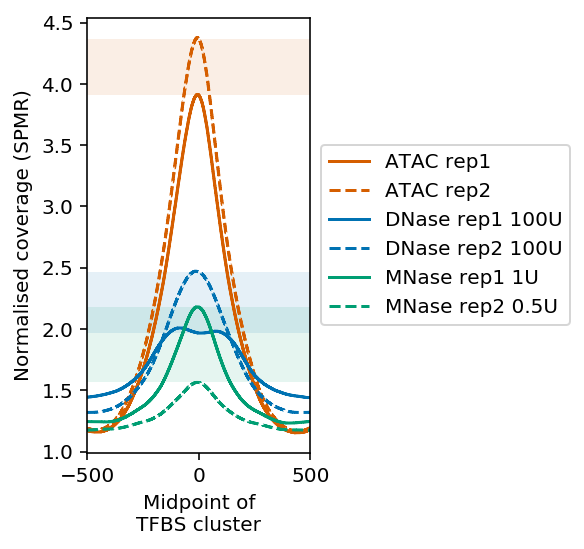

In [3]:
fig = plt.figure(figsize=(2,4))

gdf_.t['atac_wt_emb_rep1'].plot(label='ATAC rep1', color=yp.RED)
gdf_.t['atac_wt_emb_rep2'].plot(label='ATAC rep2', color=yp.RED, linestyle='dashed')
gdf_.t['dnase_wt_emb_rep1'].plot(label='DNase rep1 100U', color=yp.BLUE)
gdf_.t['dnase_wt_emb_rep2'].plot(label='DNase rep2 100U', color=yp.BLUE, linestyle='dashed')
gdf_.t['mnase_wt_emb_rep1'].plot(label='MNase rep1 1U', color=yp.GREEN)
gdf_.t['mnase_wt_emb_rep2'].plot(label='MNase rep2 0.5U', color=yp.GREEN, linestyle='dashed')

def errorbar_range(m1, m2, self_, *args, **kwargs):
    n_ = m1.shape[0]
    m1_mid = m1[:,m1.shape[1] // 2]
    m2_mid = m2[:,m2.shape[1] // 2]
    m1_mean = np.mean(m1_mid)
    m2_mean = np.mean(m2_mid)
    lo_ = min(m1_mean, m2_mean)
    hi_ = max(m1_mean, m2_mean)
    xy_ = (self_.imshow_extent[0], lo_)
    width_ = self_.imshow_extent[1] - self_.imshow_extent[0]
    height_ = hi_ - lo_
    plt.gca().add_patch(matplotlib.patches.Rectangle(xy_, width_, height_, alpha=0.1, linewidth=0, *args, **kwargs))

errorbar_range(
    m1=gdf_.t['atac_wt_emb_rep1'].m,
    m2=gdf_.t['atac_wt_emb_rep2'].m,
    self_=gdf_.t['atac_wt_emb_rep1'],
    color=yp.RED,
)

errorbar_range(
    m1=gdf_.t['dnase_wt_emb_rep1'].m,
    m2=gdf_.t['dnase_wt_emb_rep2'].m,
    self_=gdf_.t['dnase_wt_emb_rep1'],
    color=yp.BLUE,
)

errorbar_range(
    m1=gdf_.t['mnase_wt_emb_rep1'].m,
    m2=gdf_.t['mnase_wt_emb_rep2'].m,
    self_=gdf_.t['mnase_wt_emb_rep1'],
    color=yp.GREEN,
)

plt.gca().set_xlabel('Midpoint of\nTFBS cluster')
plt.gca().set_ylabel('Normalised coverage (SPMR)')
plt.gca().set_xlim([-500, 500])
plt.gca().legend(loc='center right', borderaxespad=-13)
fp_ = 'annot_eLife_revised/_fig/Fig1S1C.pdf'
plt.savefig(fp_, dpi=600, transparent=True, bbox_inches='tight')

gdf: pos_column unspecified, reverting to mean(start, end)
mread_regions True dnase_wt_emb_rep1_10U_ml.bw.mread_regions_d168a5c3f3406cdbdbe0808ec92f2053.tmp
mread_regions True dnase_wt_emb_rep1_25U_ml.bw.mread_regions_8cd551e755d85b7cbead7191d26e63ab.tmp
mread_regions True dnase_wt_emb_rep1_50U_ml.bw.mread_regions_aeffc264c23e765de81af950fb329e9f.tmp
mread_regions True dnase_wt_emb_rep1_100U_ml.bw.mread_regions_0cbd8cac2d803afaec6a99c0be115eb8.tmp
mread_regions True dnase_wt_emb_rep1_200U_ml.bw.mread_regions_956c84ba71540e8d1549fdf202e15aa2.tmp


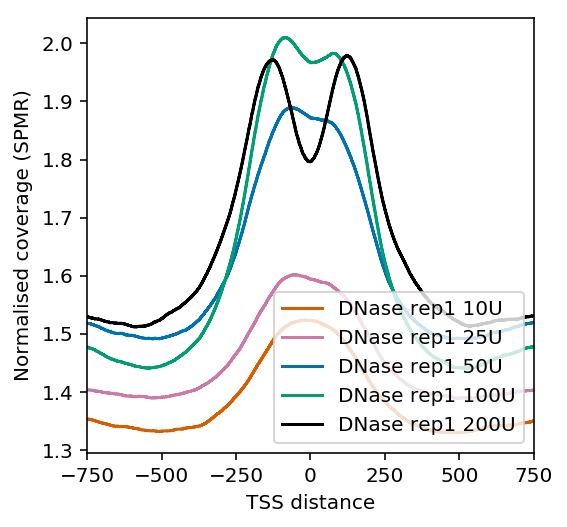

In [4]:
fig = plt.figure(figsize=(4,4))
gdf_ = yp.GenomicDataFrame(df_)
flank_len_ = 750

fp_ = 'dnase_mnase819_geo/tracks/dnase_wt_emb_rep1_10U_ml.bw'
gdf_.add_track('dnase_wt_emb_rep1_10U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/dnase_wt_emb_rep1_25U_ml.bw'
gdf_.add_track('dnase_wt_emb_rep1_25U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/dnase_wt_emb_rep1_50U_ml.bw'
gdf_.add_track('dnase_wt_emb_rep1_50U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/dnase_wt_emb_rep1_100U_ml.bw'
gdf_.add_track('dnase_wt_emb_rep1_100U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/dnase_wt_emb_rep1_200U_ml.bw'
gdf_.add_track('dnase_wt_emb_rep1_200U', fp_, flank_len=flank_len_, bin_size=1)

gdf_.t['dnase_wt_emb_rep1_10U'].plot(label='DNase rep1 10U', color=yp.RED)
gdf_.t['dnase_wt_emb_rep1_25U'].plot(label='DNase rep1 25U', color=yp.PURPLE)
gdf_.t['dnase_wt_emb_rep1_50U'].plot(label='DNase rep1 50U', color=yp.BLUE)
gdf_.t['dnase_wt_emb_rep1_100U'].plot(label='DNase rep1 100U', color=yp.GREEN)
gdf_.t['dnase_wt_emb_rep1_200U'].plot(label='DNase rep1 200U', color=yp.BLACK)

plt.gca().set_xlabel('TSS distance')
plt.gca().set_ylabel('Normalised coverage (SPMR)')
plt.gca().legend(loc='lower right')

gdf: pos_column unspecified, reverting to mean(start, end)
mread_regions True dnase_wt_emb_rep2_10U_ml.bw.mread_regions_5f0c4a488037330d2bcc79d73709611b.tmp
mread_regions True dnase_wt_emb_rep2_25U_ml.bw.mread_regions_d50994f760a92ef57d60f39b7f9b63ad.tmp
mread_regions True dnase_wt_emb_rep2_50U_ml.bw.mread_regions_fa0795f8d442ad8663cf2c337a97bec5.tmp
mread_regions True dnase_wt_emb_rep2_100U_ml.bw.mread_regions_ce4b2cdc487bc245208eb8a3cc2d902a.tmp
mread_regions True dnase_wt_emb_rep2_200U_ml.bw.mread_regions_80801bb49d510fb4c3132e5a3a0a6adb.tmp


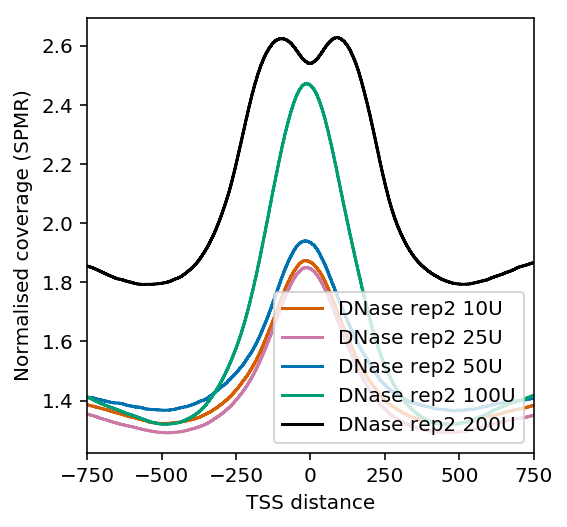

In [5]:
fig = plt.figure(figsize=(4,4))
gdf_ = yp.GenomicDataFrame(df_)
flank_len_ = 750

fp_ = 'dnase_mnase819_geo/tracks/dnase_wt_emb_rep2_10U_ml.bw'
gdf_.add_track('dnase_wt_emb_rep2_10U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/dnase_wt_emb_rep2_25U_ml.bw'
gdf_.add_track('dnase_wt_emb_rep2_25U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/dnase_wt_emb_rep2_50U_ml.bw'
gdf_.add_track('dnase_wt_emb_rep2_50U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/dnase_wt_emb_rep2_100U_ml.bw'
gdf_.add_track('dnase_wt_emb_rep2_100U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/dnase_wt_emb_rep2_200U_ml.bw'
gdf_.add_track('dnase_wt_emb_rep2_200U', fp_, flank_len=flank_len_, bin_size=1)

gdf_.t['dnase_wt_emb_rep2_10U'].plot(label='DNase rep2 10U', color=yp.RED)
gdf_.t['dnase_wt_emb_rep2_25U'].plot(label='DNase rep2 25U', color=yp.PURPLE)
gdf_.t['dnase_wt_emb_rep2_50U'].plot(label='DNase rep2 50U', color=yp.BLUE)
gdf_.t['dnase_wt_emb_rep2_100U'].plot(label='DNase rep2 100U', color=yp.GREEN)
gdf_.t['dnase_wt_emb_rep2_200U'].plot(label='DNase rep2 200U', color=yp.BLACK)

plt.gca().set_xlabel('TSS distance')
plt.gca().set_ylabel('Normalised coverage (SPMR)')
plt.gca().legend(loc='lower right')

gdf: pos_column unspecified, reverting to mean(start, end)
mread_regions True mnase_wt_emb_rep1_0.25U_ml.bw.mread_regions_54f11c3066f0a49fd324b84b436c4f91.tmp
mread_regions True mnase_wt_emb_rep1_0.5U_ml.bw.mread_regions_b89f5b173c6ef17d1f9b539ed590421c.tmp
mread_regions True mnase_wt_emb_rep1_1U_ml.bw.mread_regions_fb8c2857d969f97538ffe1a2cb9d74ab.tmp
mread_regions True mnase_wt_emb_rep1_4U_ml.bw.mread_regions_40aaf5400689ac20e8019f9272304b01.tmp


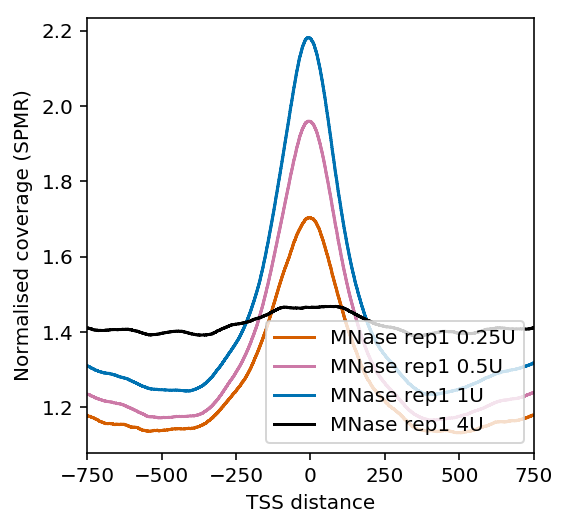

In [6]:
fig = plt.figure(figsize=(4,4))
gdf_ = yp.GenomicDataFrame(df_)
flank_len_ = 750

fp_ = 'dnase_mnase819_geo/tracks/mnase_wt_emb_rep1_0.25U_ml.bw'
gdf_.add_track('mnase_wt_emb_rep1_0.25U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/mnase_wt_emb_rep1_0.5U_ml.bw'
gdf_.add_track('mnase_wt_emb_rep1_0.5U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/mnase_wt_emb_rep1_1U_ml.bw'
gdf_.add_track('mnase_wt_emb_rep1_1U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/mnase_wt_emb_rep1_4U_ml.bw'
gdf_.add_track('mnase_wt_emb_rep1_4U', fp_, flank_len=flank_len_, bin_size=1)

gdf_.t['mnase_wt_emb_rep1_0.25U'].plot(label='MNase rep1 0.25U', color=yp.RED)
gdf_.t['mnase_wt_emb_rep1_0.5U'].plot(label='MNase rep1 0.5U', color=yp.PURPLE)
gdf_.t['mnase_wt_emb_rep1_1U'].plot(label='MNase rep1 1U', color=yp.BLUE)
gdf_.t['mnase_wt_emb_rep1_4U'].plot(label='MNase rep1 4U', color=yp.BLACK)

plt.gca().set_xlabel('TSS distance')
plt.gca().set_ylabel('Normalised coverage (SPMR)')
plt.gca().legend(loc='lower right')

gdf: pos_column unspecified, reverting to mean(start, end)
mread_regions True mnase_wt_emb_rep2_0.25U_ml.bw.mread_regions_ffe5e6240905f73afaa6463ff71a5a1b.tmp
mread_regions True mnase_wt_emb_rep2_0.5U_ml.bw.mread_regions_115d509d240c2a9a1dc2626aa7db91bc.tmp
mread_regions True mnase_wt_emb_rep2_1U_ml.bw.mread_regions_4807b036264abe85f934e30625fc507f.tmp
mread_regions True mnase_wt_emb_rep2_4U_ml.bw.mread_regions_4bebfee14f7921334322980fa3f4a29f.tmp


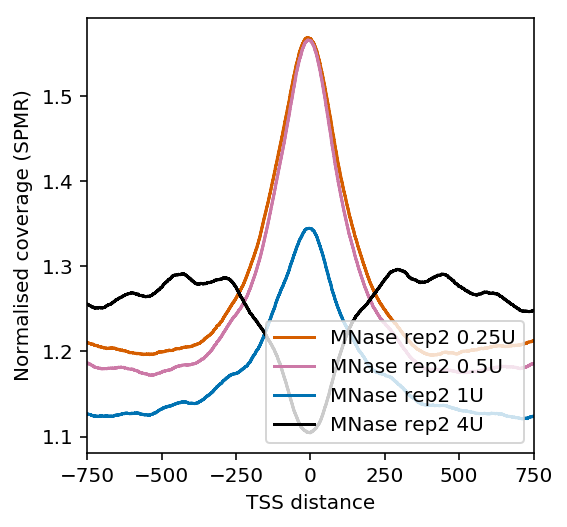

In [7]:
fig = plt.figure(figsize=(4,4))
gdf_ = yp.GenomicDataFrame(df_)
flank_len_ = 750

fp_ = 'dnase_mnase819_geo/tracks/mnase_wt_emb_rep2_0.25U_ml.bw'
gdf_.add_track('mnase_wt_emb_rep2_0.25U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/mnase_wt_emb_rep2_0.5U_ml.bw'
gdf_.add_track('mnase_wt_emb_rep2_0.5U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/mnase_wt_emb_rep2_1U_ml.bw'
gdf_.add_track('mnase_wt_emb_rep2_1U', fp_, flank_len=flank_len_, bin_size=1)
fp_ = 'dnase_mnase819_geo/tracks/mnase_wt_emb_rep2_4U_ml.bw'
gdf_.add_track('mnase_wt_emb_rep2_4U', fp_, flank_len=flank_len_, bin_size=1)

gdf_.t['mnase_wt_emb_rep2_0.25U'].plot(label='MNase rep2 0.25U', color=yp.RED)
gdf_.t['mnase_wt_emb_rep2_0.5U'].plot(label='MNase rep2 0.5U', color=yp.PURPLE)
gdf_.t['mnase_wt_emb_rep2_1U'].plot(label='MNase rep2 1U', color=yp.BLUE)
gdf_.t['mnase_wt_emb_rep2_4U'].plot(label='MNase rep2 4U', color=yp.BLACK)

plt.gca().set_xlabel('TSS distance')
plt.gca().set_ylabel('Normalised coverage (SPMR)')
plt.gca().legend(loc='lower right')